In [ ]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install ipython
!pip install kneed


In [2]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/27_info_WGS_20220922.xlsx')
df_col= df.columns
df = df.loc[:, ['sample_id', 'wintering_lat', 'wintering_lon']]
df.dropna(inplace=True)
df.replace(r'(?<=\d),(?=\d)', '.', regex=True, inplace=True)
df_matrix = df.loc[:,['wintering_lat','wintering_lon']] 



In [5]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=100,
    max_iter=3000,
    random_state=42
)

mat =df_matrix.values

In [8]:
kmeans.fit(mat)

KMeans(init='random', max_iter=3000, n_clusters=4, n_init=100, random_state=42)

In [9]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
kmeans.labels_


64.12862794103157
[[-16.82222222  20.43178667]
 [-25.55        20.4317885 ]
 [  0.11954125  12.5209055 ]
 [-29.6         25.3964925 ]]
3


array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int32)

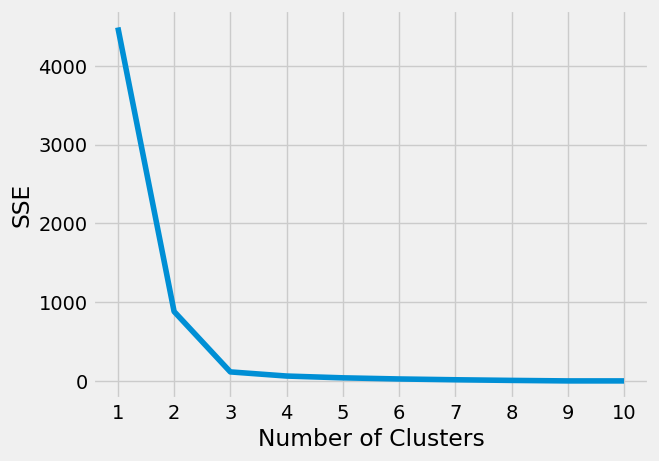

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mat)
    sse.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
import numpy as np
the_category = pd.DataFrame(kmeans.labels_)
df['The_allocated_cluster']=kmeans.labels_
df['The_allocated_cluster']=df['The_allocated_cluster'].astype('category')
df

,sample_id,wintering_lat,wintering_lon,The_allocated_cluster
0,25042295,0.02633,12.520902,2
1,25042296,0.09000,12.520903,2
2,25042297,0.15000,12.520904,2
3,25042298,0.24000,12.520905,2
4,25042299,0.13000,12.520906,2
5,25042300,0.11000,12.520907,2
6,25042301,0.14000,12.520908,2
7,25042302,0.07000,12.520909,2
8,25042284,-16.90000,20.431782,0
9,25042285,-16.30000,20.431783,0


In [11]:
import plotly.express as px
fig = px.scatter_geo(df, lat='wintering_lat', lon='wintering_lon' , color="The_allocated_cluster",hover_name="sample_id")
fig.show()
fig.write_html ("file.html")

In [ ]:
!pip install miniconda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement miniconda (from versions: none)
ERROR: No matching distribution found for miniconda
